
# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [2 балла] Загрузка и предобработка данных - загрузите датасет, посмотрите на его `head` и `tail`. Выполните преобразование значений и воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T()`
2. [1 балл] Сколько в выборке женщин-раковых больных? (Целевая переменная - `Dx:Cancer`)
3. [1 балл] Какой средний возраст женщин в выборке?
4. [2 балла] Правда ли, что у женщин с подтвержденным наличием рака, в среднем, выше возраст? Больше стаж курения? Больше число беременностей? Выясните это при помощи метода `groupby`. Вновь для удобства отображения получившийся датасет можно транспонировать при помощи `.T()`
5. [1 балл] Визуализация - Постройте гистограммы всех переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Какие два фактора наиболее сильно влияют на наличие рака?
7. [2 балла] Визуализация - При помощи `pairplot` постройте попарные графики для факторов, перечисленных в переменной `columns`. Окрасте точки в зависимости от наличия или отсутствия у женщины рака. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
columns = ['Age', 'Number_of_sexual_partners', 
        'First_sexual_intercourse', 'STDs_(number)', 
        'Smokes(years)', 'Hormonal_Contraceptives(years)','IUD(years)', 'cancer']

In [3]:
data = pd.read_excel('/Users/macbook/Desktop/anastasiaakchurina177_kopia.xlsx')
data.head()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


Так как в данных пропущенные и неизвестные значения заполняются при помощи знака вопроса `?`, давайте заменим его на что-то более числовое и логичное, например на ноль.

In [4]:
# заменяем значения
data = data.replace('?','0')
data = data.astype(float)

In [5]:
data.head(5)

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail(5)

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,29.0,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.describe()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.451049,16.856643,2.127040,0.143357,1.201241,0.330894,0.560606,354.579038,0.096737,...,0.508159,0.481352,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.698528,3.183491,1.508108,0.350641,4.060623,2.128571,0.496603,3890.189914,0.295771,...,2.388333,2.297125,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.820550,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,43226.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print('Number of cancerous patients',data.loc[:,['Dx_Cancer']][data['Dx_Cancer'] == 1].count())
print('Mean age', data.Age.mean())

Number of cancerous patients Dx_Cancer    18
dtype: int64
Mean age 26.82051282051282


In [9]:
x = float(data.loc[:,['Age']][data['Dx_Cancer'] == 1].mean())
y = float(data.loc[:,['Age']][data['Dx_Cancer'] == 0].mean())
print('mean age of cancerous', x)
print('mean age of non cancerous', y)
print('The cancerous are older on average',x>y)

mean age of cancerous 33.22222222222222
mean age of non cancerous 26.683333333333334
The cancerous are older on average True


In [10]:
c = float(data.loc[:,['Smokes(years)']][data['Dx_Cancer'] == 1].mean())
d = float(data.loc[:,['Smokes(years)']][data['Dx_Cancer'] == 0].mean())
print('mean tenure of cancerous', c)
print('mean tenure of non cancerous', d)
print('The cancerous smoke more on average',c>d)


a = float(data.loc[:,['Num_of_pregnancies']][data['Dx_Cancer'] == 1].mean())
b = float(data.loc[:,['Num_of_pregnancies']][data['Dx_Cancer'] == 0].mean())
print('mean age of cancerous', a)
print('mean age of non cancerous', b)
print('The cancerous get pregnant more on average',a>b)

mean tenure of cancerous 2.6666666666666665
mean tenure of non cancerous 1.169838801946428
The cancerous smoke more on average True
mean age of cancerous 2.611111111111111
mean age of non cancerous 2.1166666666666667
The cancerous get pregnant more on average True


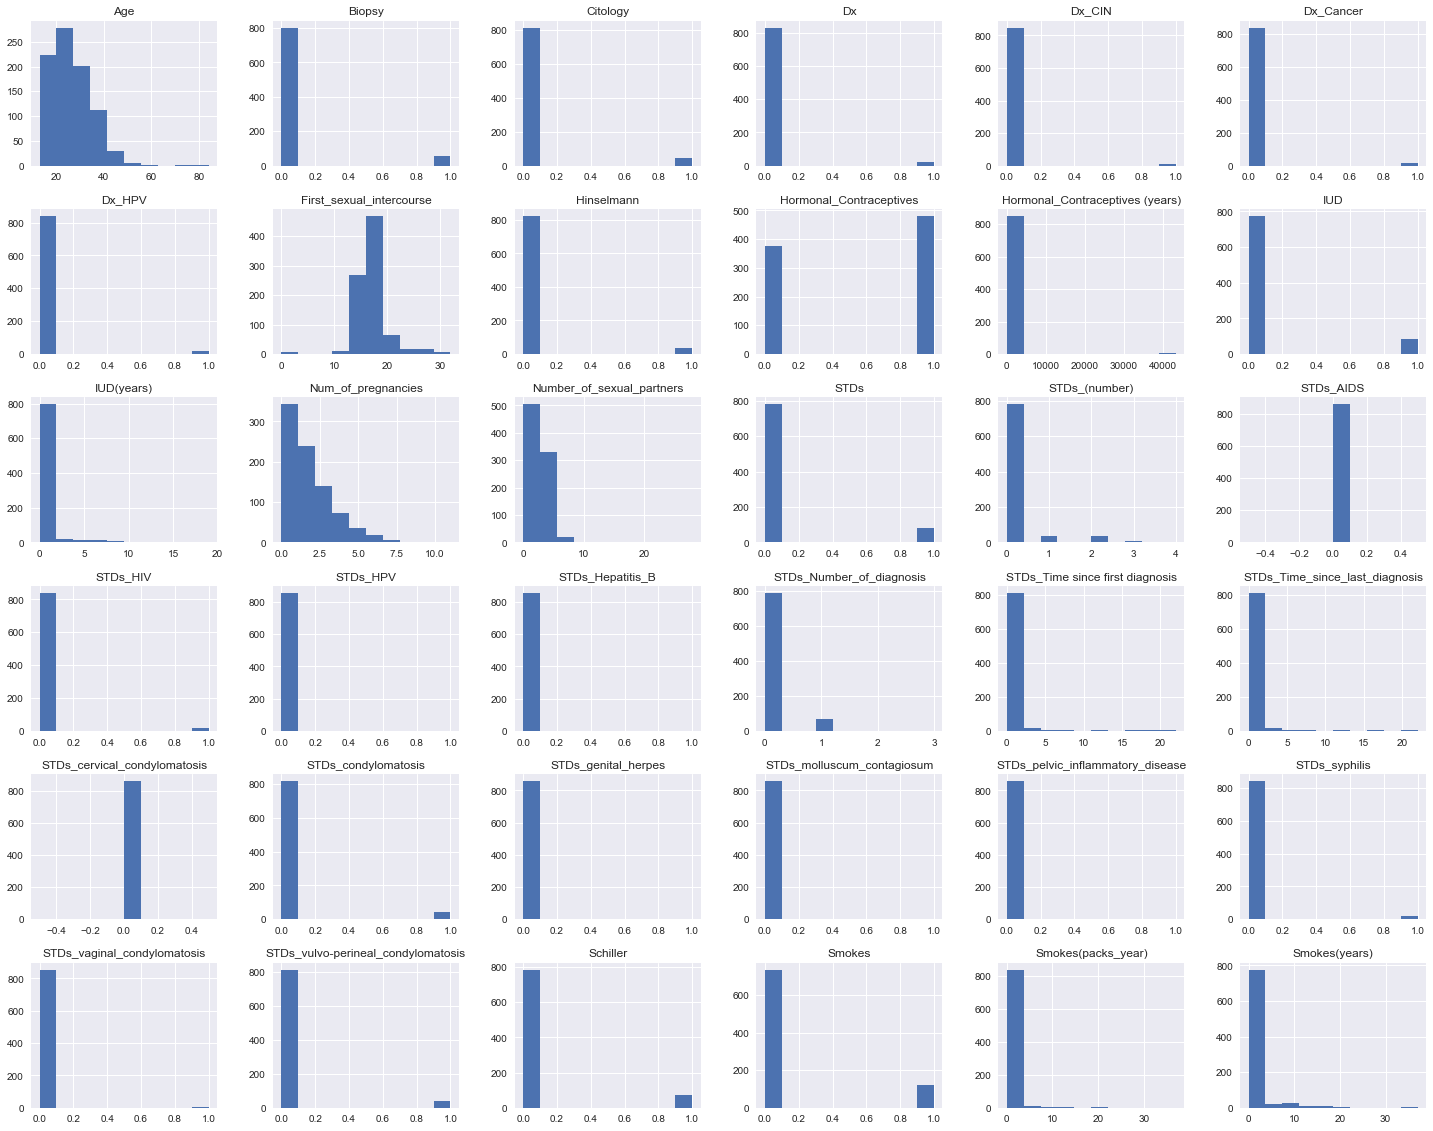

In [11]:
data.hist(figsize=(25,20));

In [12]:
print('Cредний возраст женщин в выборке',data.Age.mean())

Cредний возраст женщин в выборке 26.82051282051282


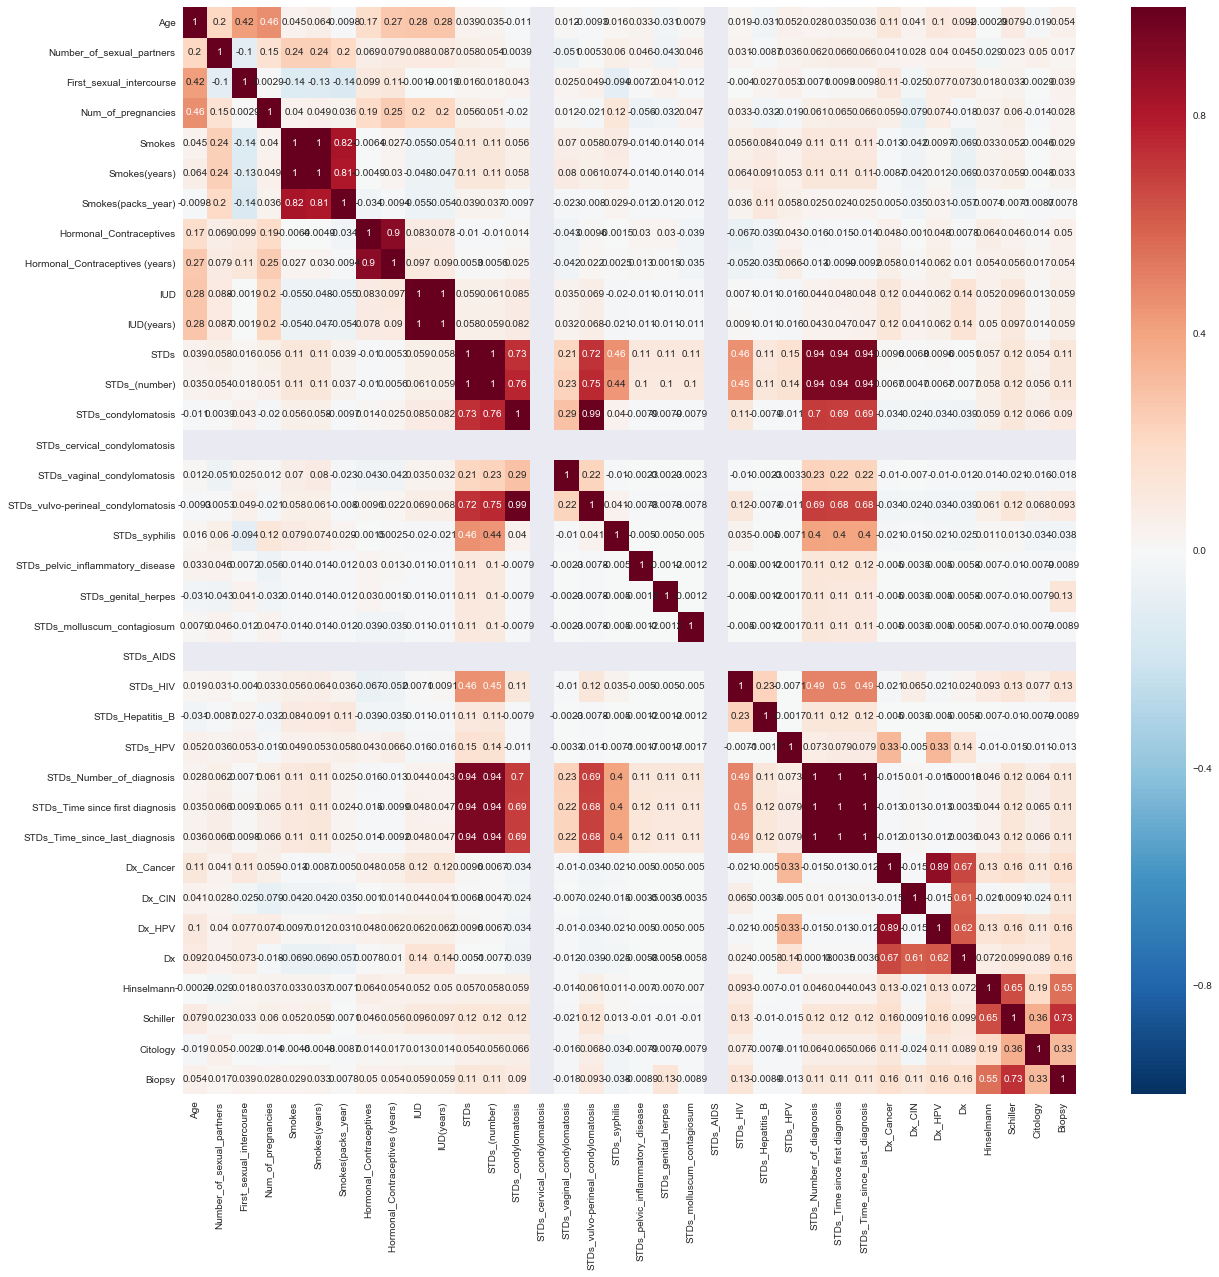

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr('spearman'), annot=True);

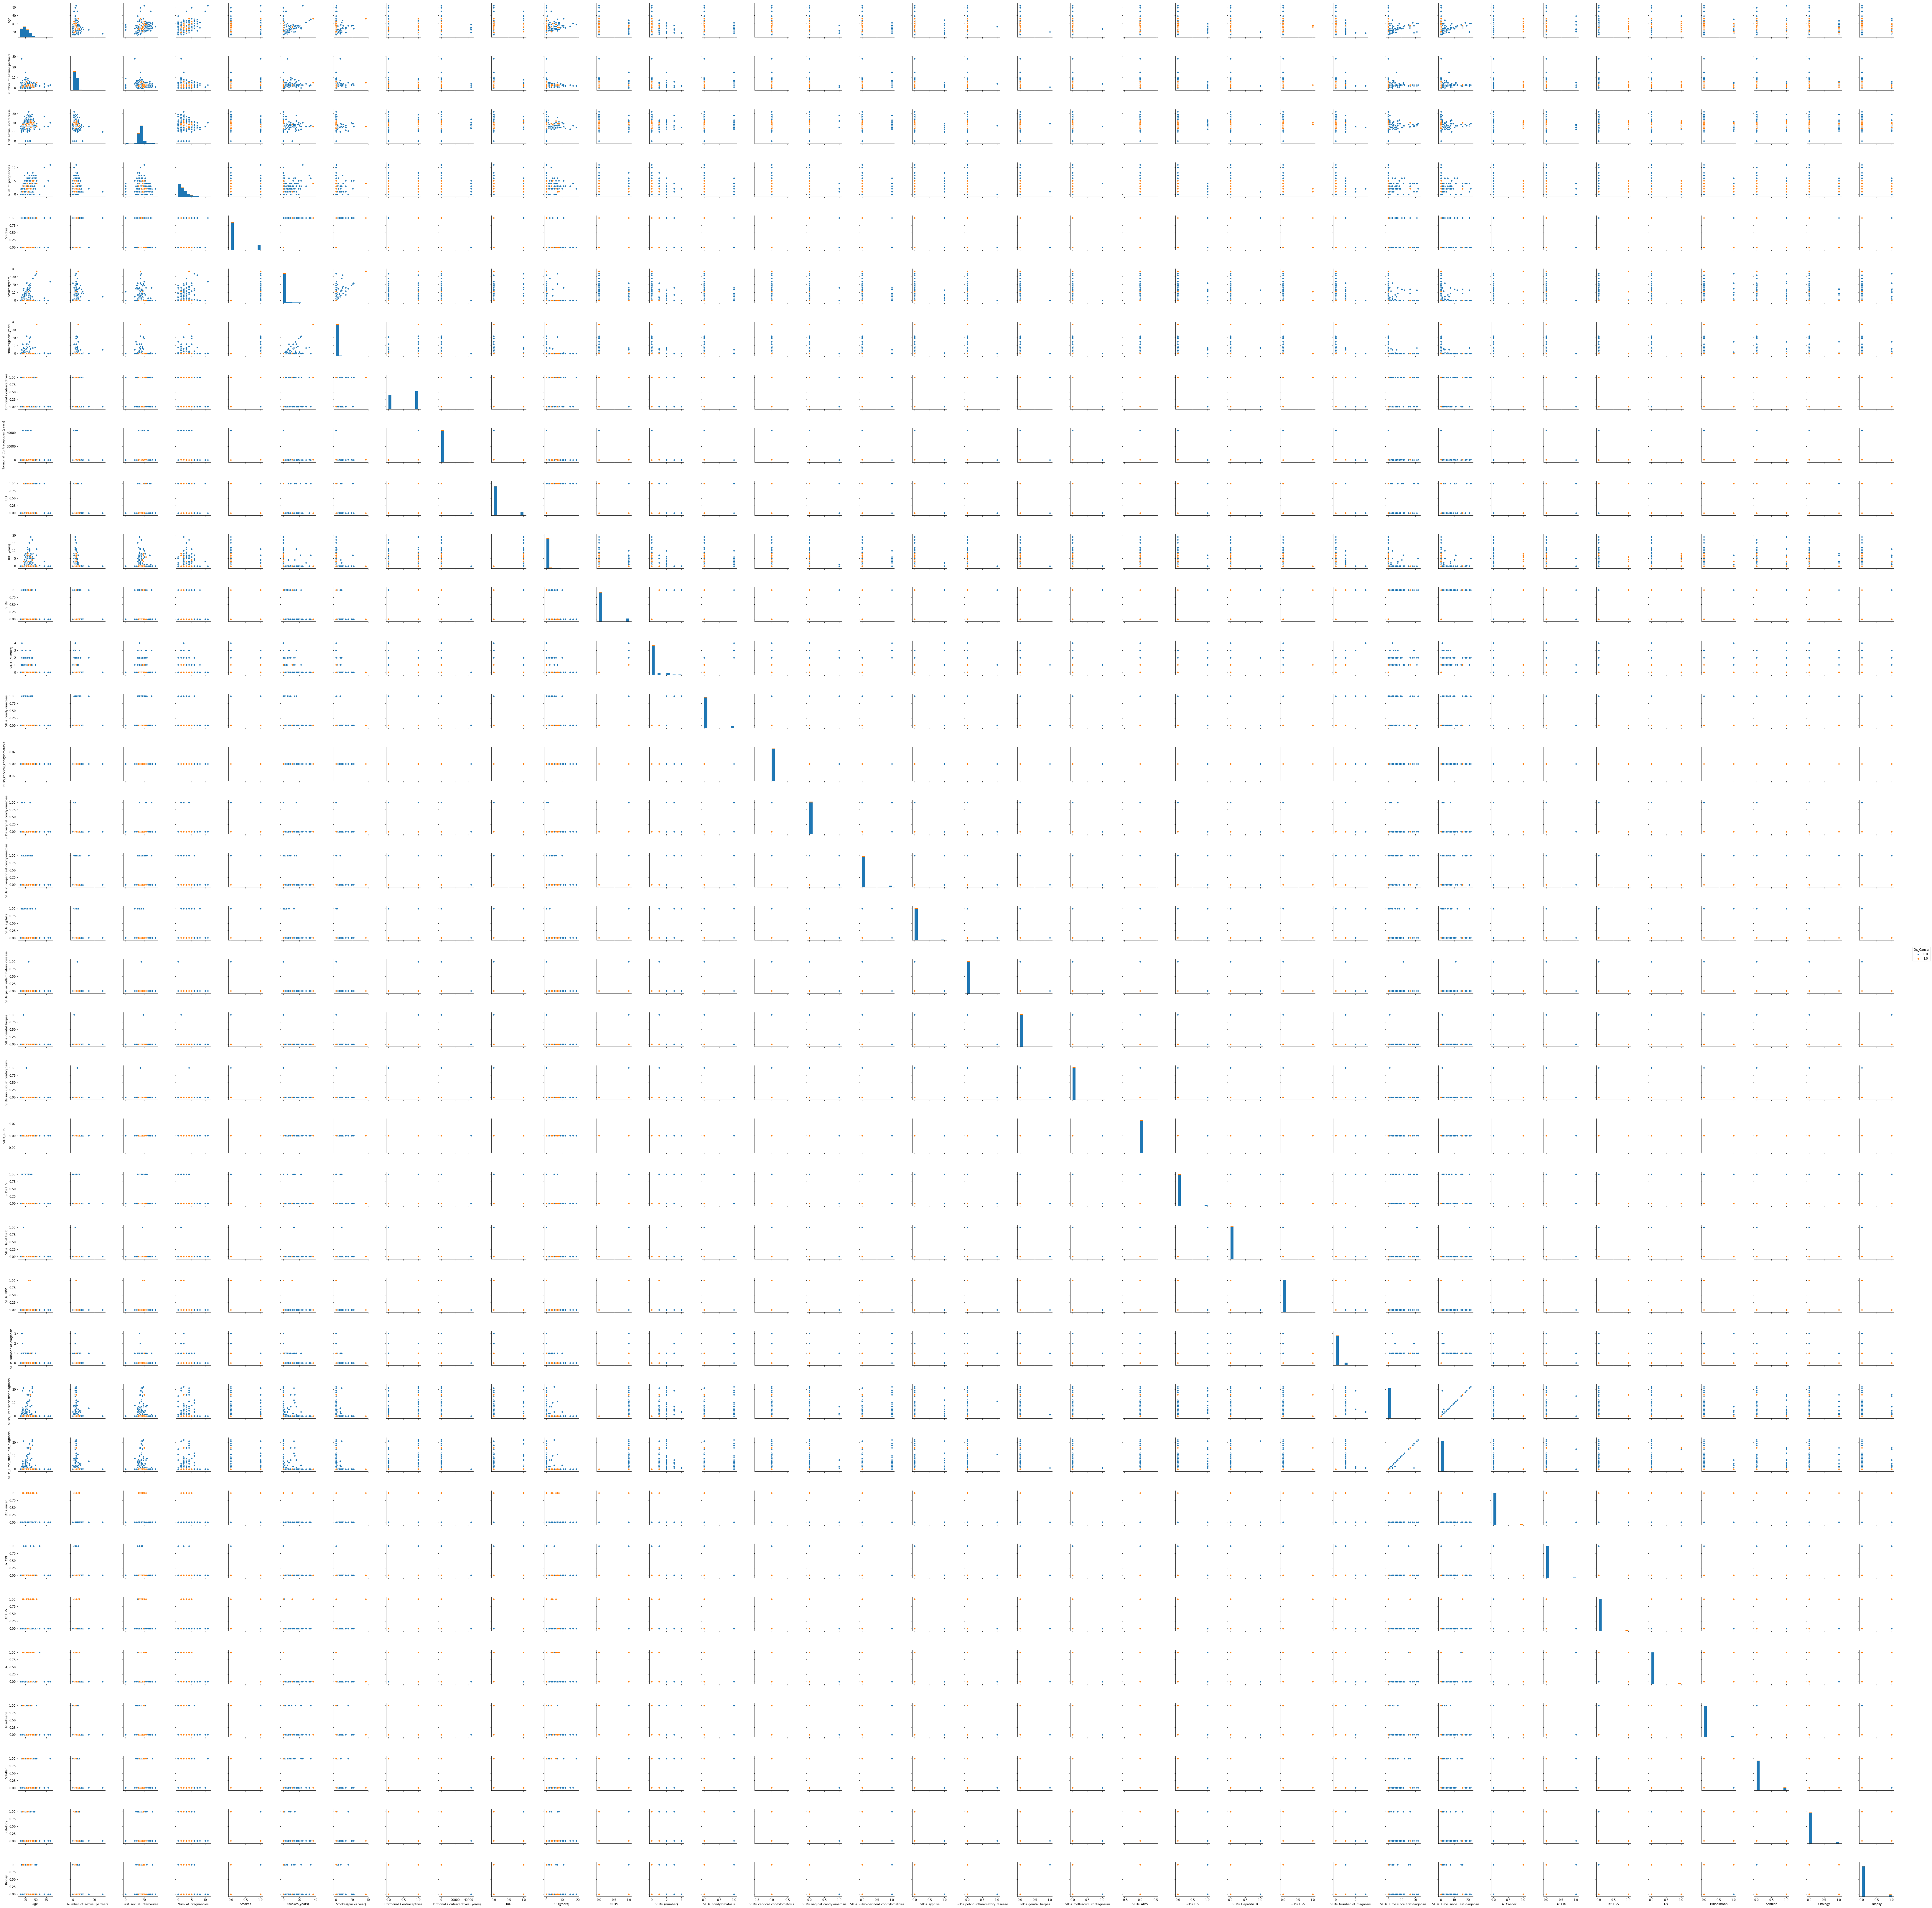

In [15]:
sns.pairplot(data, hue='Dx_Cancer')

# Модель для предсказывания наличия рака


# 1. Предобработка данных

In [14]:
data.isnull().sum() #никаких пропусков и это прекрасно

Age                                   0
Number_of_sexual_partners             0
First_sexual_intercourse              0
Num_of_pregnancies                    0
Smokes                                0
Smokes(years)                         0
Smokes(packs_year)                    0
Hormonal_Contraceptives               0
Hormonal_Contraceptives (years)       0
IUD                                   0
IUD(years)                            0
STDs                                  0
STDs_(number)                         0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo-perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0
STDs_HPV                              0


In [15]:
data.info() #общие данные показателей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null float64
Number_of_sexual_partners             858 non-null float64
First_sexual_intercourse              858 non-null float64
Num_of_pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes(years)                         858 non-null float64
Smokes(packs_year)                    858 non-null float64
Hormonal_Contraceptives               858 non-null float64
Hormonal_Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD(years)                            858 non-null float64
STDs                                  858 non-null float64
STDs_(number)                         858 non-null float64
STDs_condylomatosis                   858 non-null float64
STDs_cervical_condylomatosis          858 non-null float64
STDs_vagin

In [16]:
data.isnull().sum()/len(data)

Age                                   0.0
Number_of_sexual_partners             0.0
First_sexual_intercourse              0.0
Num_of_pregnancies                    0.0
Smokes                                0.0
Smokes(years)                         0.0
Smokes(packs_year)                    0.0
Hormonal_Contraceptives               0.0
Hormonal_Contraceptives (years)       0.0
IUD                                   0.0
IUD(years)                            0.0
STDs                                  0.0
STDs_(number)                         0.0
STDs_condylomatosis                   0.0
STDs_cervical_condylomatosis          0.0
STDs_vaginal_condylomatosis           0.0
STDs_vulvo-perineal_condylomatosis    0.0
STDs_syphilis                         0.0
STDs_pelvic_inflammatory_disease      0.0
STDs_genital_herpes                   0.0
STDs_molluscum_contagiosum            0.0
STDs_AIDS                             0.0
STDs_HIV                              0.0
STDs_Hepatitis_B                  

In [17]:
target_var = 'Dx_Cancer'  # переменная, которую я буду прогнозировать
#Так как у меня много данных, но все они могут быть важны - ничего не дропаю
contin_var = ['Age','Number_of_sexual_partners','First_sexual_intercourse','Num_of_pregnancies',
              'Smokes','Smokes(years)','Smokes(packs_year)','Hormonal_Contraceptives',
              'Hormonal_Contraceptives (years)','IUD','IUD(years)','STDs','STDs_(number)',
              'STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis',
              'STDs_vulvo-perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease',
              'STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV',
              'STDs_Hepatitis_B','STDs_HPV','STDs_Number_of_diagnosis','STDs_Time since first diagnosis',
              'STDs_Time_since_last_diagnosis','Dx_CIN','Dx_HPV','Dx',
              'Hinselmann','Schiller','Citology','Biopsy'] # непрерывные 

# 2. Непрерывные переменные

In [135]:
data_target = data[target_var]
data_target.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Dx_Cancer, dtype: float64

In [136]:
data_target.isnull().sum() #пропусков нет и это хорошо

0

In [22]:
data_contin = data[contin_var]
data_contin.head()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Number_of_diagnosis,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data_contin.isnull().sum()

Age                                   0
Number_of_sexual_partners             0
First_sexual_intercourse              0
Num_of_pregnancies                    0
Smokes                                0
Smokes(years)                         0
Smokes(packs_year)                    0
Hormonal_Contraceptives               0
Hormonal_Contraceptives (years)       0
IUD                                   0
IUD(years)                            0
STDs                                  0
STDs_(number)                         0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo-perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0
STDs_HPV                              0


In [24]:
data = pd.concat([data[target_var],data_contin], axis=1)
data.head()

,Dx_Cancer,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),...,STDs_Number_of_diagnosis,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,34.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


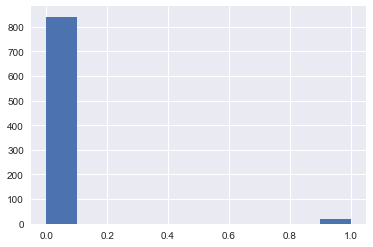

In [25]:
data.Dx_Cancer.hist()

In [27]:
y = data['Dx_Cancer']
x = data.drop('Dx_Cancer', axis=1)
x.shape, y.shape

((858, 35), (858,))

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(600, 35) (600,)
(258, 35) (258,)


# 3. Метод ближайшего соседа

In [30]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train, y_train)
y_predicted = clf_knn.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.9767441860465116
Precision = 0.5
Recall = 0.16666666666666666
F1_score = 0.25


In [32]:
y_proba = clf_knn.predict_proba(x_test)
y_proba[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Комментарий
В модели kNN сейчас всего 1 сосед, то есть для каждого неизвестного наблюдения мы считаем расстояние только до одного соседа, и к какому классу этот совед принадлежит, такой класс и присваиваем неизвестному. Поэтому вероятность при таком числе соседей считать бессмысленно - она всегда единичка. А вот если увеличить число соседей, допустим, до 10, и, предположим, 4 соседа оказались с заболеванием, а 6 - без, то вероятность принадлежности неизвестного наблюдения к заболевшим будет равна 0.4

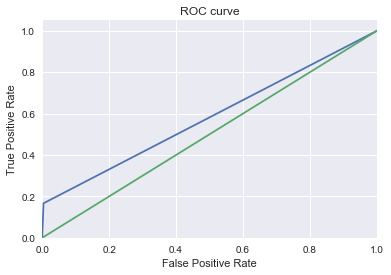

In [38]:
# подгружаем из пакета метрику roc_auc 
# и функцию для строительства кривой
from sklearn.metrics import roc_auc_score, roc_curve

# перебираем пороги и ищем для каждого fpr и tpr: 
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [39]:
# считаем площадь под кривой
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

AUC = 0.5813492063492064


# 4. Логистическая регрессия

In [47]:
from sklearn.linear_model import LogisticRegression
# объявляем модель
logit = LogisticRegression()
# обучаем на тренировочной выборке
logit.fit(x_train, y_train)
# предсказываем вероятности
y_proba = logit.predict_proba(x_test)
# предсказываем сами метки классов
y_predicted = logit.predict(x_test)

In [49]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.9844961240310077
Precision = 0.75
Recall = 0.5
F1_score = 0.6


AUC = 0.8333333333333334


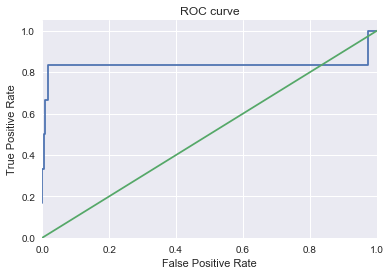

In [53]:
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

# перебираем пороги и ищем для каждого fpr и tpr: 
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

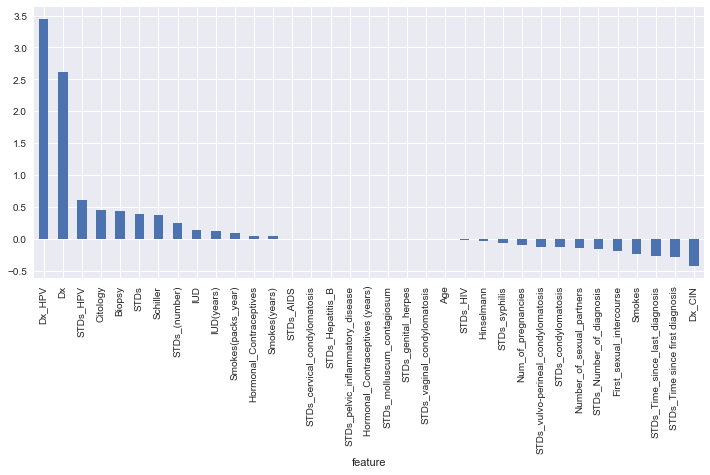

In [45]:
featureImportance = pd.DataFrame({"feature": data.drop('Dx_Cancer',axis=1).columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(12,5));

# 5. Дерево Решений 

In [54]:
from sklearn.tree import DecisionTreeClassifier # подгрузили дерево

In [56]:
clf_tree = DecisionTreeClassifier()     # объявили дерево
clf_tree.fit(x_train, y_train)          # научили дерево
y_predicted = clf_tree.predict(x_test)  # предсказали метки класса
y_proba = clf_tree.predict_proba(x_test)# предсказали вероястности

In [57]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.9961240310077519
Precision = 0.8571428571428571
Recall = 1.0
F1_score = 0.923076923076923


AUC = 0.998015873015873


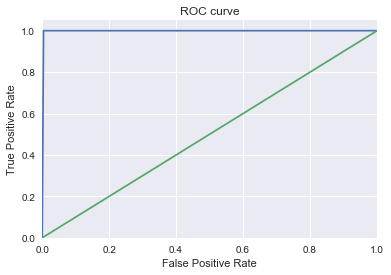

In [58]:
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

# перебираем пороги и ищем для каждого fpr и tpr: 
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

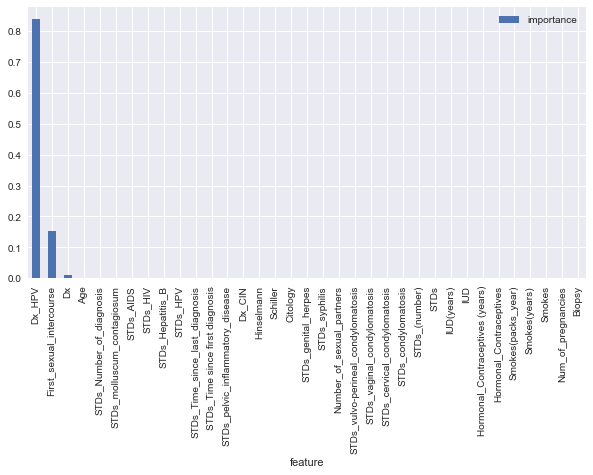

In [61]:
featureImportance = pd.DataFrame({"feature": data.drop('Dx_Cancer',axis=1).columns, 
                                  "importance": clf_tree.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance.plot.bar(figsize=(10, 5));

- Если что, эта самая важная переменная - Dx_HPV переводится как "папилломовирус"
- Посмотрев одну из страниц мед.сайта я кое-что нашла - это cercival cancer (церквиальный, относящийся к шейке матки) при котором сдают анализ на Dx_HPV, то есть, наличие данной болезни увеличивает вероятность появления рака у заболеваемого. 
- Поэтому полученной из случайного леса информации мы можем верить однозначно, но результаты логистической регрессии показ:3

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.9767441860465116
Precision = 0.5
Recall = 0.16666666666666666
F1_score = 0.25


 # 6. Случайный лес

In [62]:
from sklearn import metrics  
from sklearn.ensemble import RandomForestClassifier

In [171]:
rfc = RandomForestClassifier(n_estimators=10) # число деревьев в лесе
rfc.fit(x_train, y_train)
y_predicted = rfc.predict(x_test)
y_proba = rfc.predict_proba(x_test)

Accuracy = 0.9922480620155039
Precision = 0.8333333333333334
Recall = 0.8333333333333334
F1_score = 0.8333333333333334
AUC = 0.9973544973544974


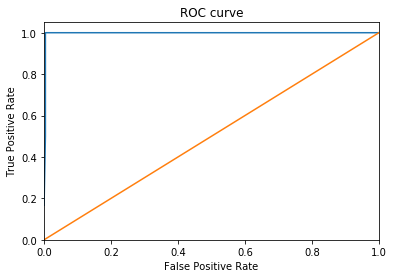

In [172]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

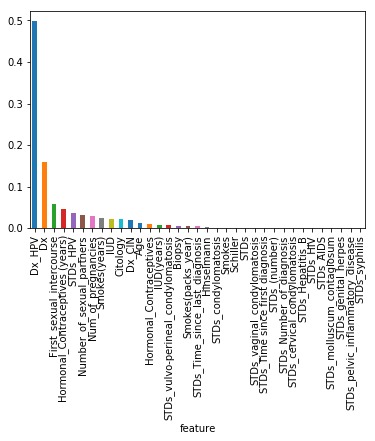

In [173]:
featureImportance = pd.DataFrame({"feature": data.drop('Dx_Cancer',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')